# Explore here

In [13]:
import pandas as pd
# URL del dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
# Cargar los datos
df = pd.read_csv(url)

# Ver los primeros registros
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### EDA

In [14]:
# Info general
print(df.info())

# Descripción estadística
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [15]:
print(df.isnull().sum())  # Muestra cuántos valores nulos hay por columna

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


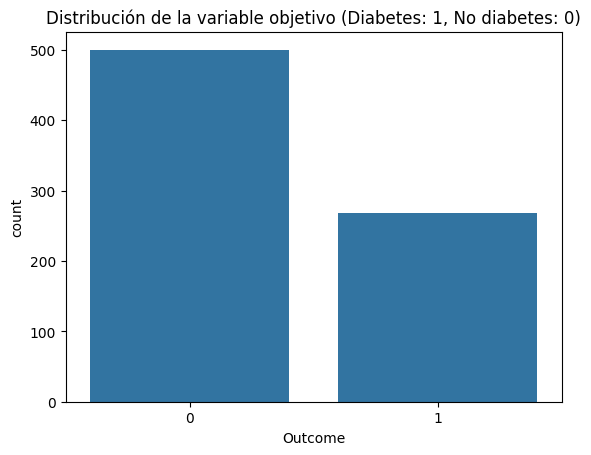

In [16]:
# Revisar la distribución de la variable objetivo

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["Outcome"])
plt.title("Distribución de la variable objetivo (Diabetes: 1, No diabetes: 0)")
plt.show()

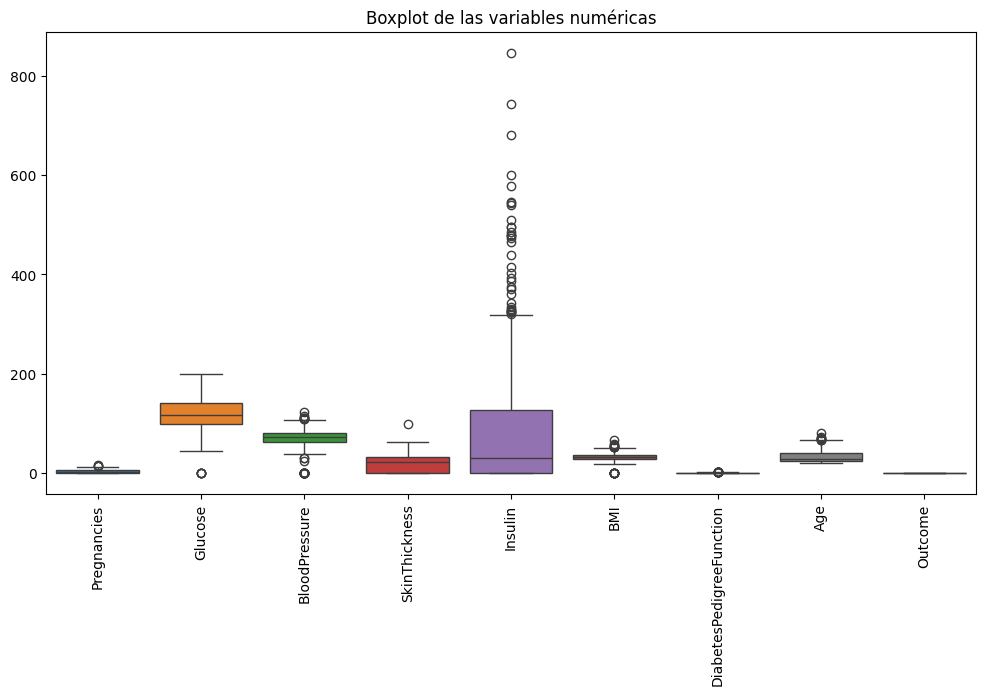

In [17]:
# Reviso outliers

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot de las variables numéricas")
plt.show()

### Empiezo a armar el modelo

In [18]:
X = df.drop(columns=["Outcome"])  # Variables predictoras
y = df["Outcome"]  # Variable objetivo

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Entreno el modelo

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Creamos el modelo con hiperparámetros básicos
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Entrenamos
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

#### Realizo las predicciones

In [21]:
y_pred_rf = modelo_rf.predict(X_test)

#### Evaluo el modelo

In [22]:
from sklearn.metrics import accuracy_score, classification_report

# Exactitud
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

# Reporte de métricas
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



### Ajusto hiperparametros

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definimos los valores a probar
param_grid = {
    "n_estimators": [50, 100, 200],  # Número de árboles
    "max_depth": [5, 10, 15, None],  # Profundidad del árbol
    "min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir
    "min_samples_leaf": [1, 2, 5]  # Mínimo de muestras en una hoja
}

# Creamos el modelo base
modelo_rf = RandomForestClassifier(random_state=42)

# GridSearchCV para encontrar la mejor combinación
grid_search = GridSearchCV(modelo_rf, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostramos los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Evaluamos con el mejor modelo
mejor_modelo_rf = grid_search.best_estimator_
y_pred_mejor_rf = mejor_modelo_rf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_mejor_rf))

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



#### Graficos de analisis de rendimiento del modelo

##### Matriz de Confusión

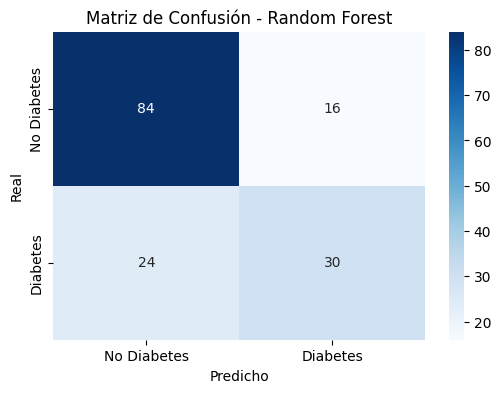

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_mejor_rf)

# Graficarla
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

##### Curva ROC y AUC

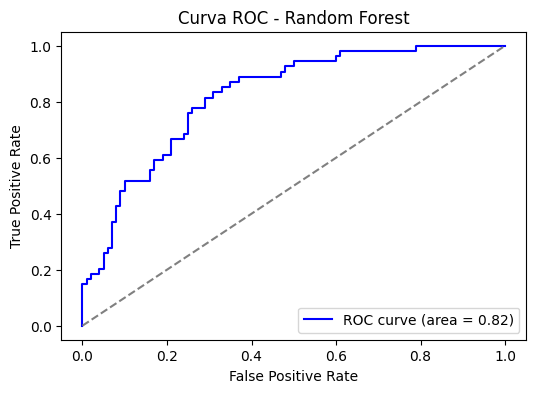

In [25]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades de predicción
y_probs_rf = mejor_modelo_rf.predict_proba(X_test)[:, 1]

# Calcular ROC
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea base
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.show()

#### Guardo los datos, modelo y predicciones

In [26]:
import joblib

# Guardamos el modelo optimizado
joblib.dump(mejor_modelo_rf, "random_forest_model.pkl")

print("✅ Modelo guardado como 'random_forest_model.pkl'")

✅ Modelo guardado como 'random_forest_model.pkl'


In [27]:
import pandas as pd

# Crear un DataFrame con las predicciones
df_resultados = pd.DataFrame({
    "Real": y_test,
    "Predicho": y_pred_mejor_rf
})

# Guardarlo en un CSV
df_resultados.to_csv("predicciones_random_forest.csv", index=False)

print("✅ Predicciones guardadas en 'predicciones_random_forest.csv'")

✅ Predicciones guardadas en 'predicciones_random_forest.csv'
